# 2.4. Problem Statement: Machine Learning 4

Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.
Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
Url=
https://raw.githubusercontent.com/BigDataGal/Python-for-Data-
Science/master/titanic-train.csv
titanic = pd.read_csv(url)
titanic.columns =
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','
Ticket','Fare','Cabin','E mbarked']
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

# Solution

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [82]:
titanic = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
# Dropping columns not used for prediction
titanic.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

## Preprocessing

In [83]:
# Checking for null values in the modified dataframe
print(titanic.isnull().any())
#titanic[titanic['Age'].isnull()]

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
dtype: bool


In [84]:
# Filling NaN values
age_mean = round(np.mean(titanic['Age']))
titanic['Age'].fillna(age_mean,inplace=True)
titanic.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [85]:
# Mapping the Sex column to numbers
titanic['Sex'] = titanic['Sex'].apply(lambda x:1 if x == 'male' else 0)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,30.0,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [86]:
# Describing the dataset for more info
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
titanic['Age'] = titanic['Age'].astype(int)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(1), int32(1), int64(5)
memory usage: 45.3 KB


## EDA

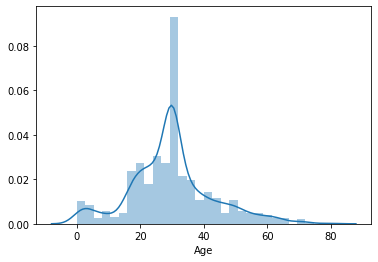

In [88]:
# Categorizing continous features to create discrete values for fitting Decision Tree
import seaborn as sns
sns.distplot(titanic['Age'])

(array([ 68.,   0., 112.,   0.,   0., 494.,   0., 153.,   0.,  64.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

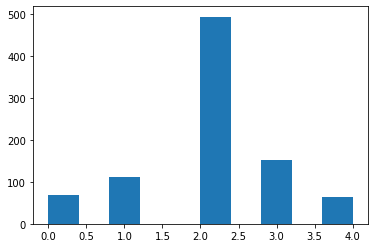

In [89]:
# Creating buckets for age based on the value
def age_category(age):
    if age < 12:
        return 0
    elif age <= 20:
        return 1
    elif age <= 35:
        return 2
    elif age <= 50:
        return 3
    else:
        return 4
    
titanic['Age'] = titanic['Age'].apply(age_category)

In [93]:
titanic.Age.unique()

array([2, 3, 4, 0, 1], dtype=int64)

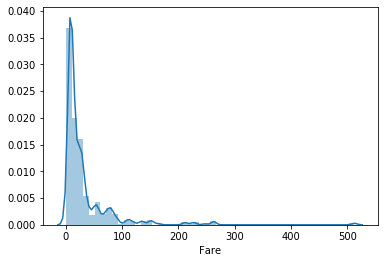

In [95]:
# Plotting the Fare distribution to identify bins for converting it to discrete variable
sns.distplot(titanic['Fare'])

In [97]:
# Using the statistical parameters to convert fare to discrete bins
titanic['Fare'].describe()
def fare_category(fare):
    if fare <= 7.91:
        return 0
    elif fare <= 14.45:
        return 1
    elif fare <= 31:
        return 2
    else:
        return 3
titanic['Fare'] = titanic['Fare'].apply(fare_category)

In [98]:
titanic.Fare.unique()

array([0, 3, 1, 2], dtype=int64)

In [100]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
dtypes: int64(7)
memory usage: 48.8 KB


In [101]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,2.037037,0.523008,0.381594,1.505051
std,0.486592,0.836071,0.477990,0.943206,1.102743,0.806057,1.118148
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.500000
50%,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,3.000000


## Training and Evaluating the model

In [107]:
# Splitting the data to training and testing set
y = titanic['Survived']
X = titanic.drop(['Survived'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print("Shape of Training set:",X_train.shape)
print("Shape of labelled data for Training:",y_train.shape)
print("Shape of Testing set:",X_test.shape)
print("Shape of labelled data for Testing:",y_test.shape)

Shape of Training set: (712, 6)
Shape of labelled data for Training: (712,)
Shape of Testing set: (179, 6)
Shape of labelled data for Testing: (179,)


In [125]:
# Fitting the model
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train,y_train)
print("Accuracy of DecisionTree classifier on training set: {:.2f}".format(dec_tree.score(X_train,y_train)))

Accuracy of DecisionTree classifier on training set: 0.87


In [134]:
# Prediction of results
y_pred = dec_tree.predict(X_test)
output_df = pd.DataFrame({'TestSet':y_test,'Predicted':y_pred})
print(output_df)
print("Accuracy of DecisionTree classifier on testing set: {:.2f}".format(dec_tree.score(X_test,y_test)))

     TestSet  Predicted
707        1          0
37         0          0
615        1          0
169        0          1
68         1          0
606        0          0
630        1          0
785        0          0
660        1          0
728        0          0
20         0          0
486        1          1
15         1          1
692        1          1
643        1          1
192        1          1
65         1          0
597        0          0
702        0          1
280        0          0
505        0          0
128        1          0
333        0          1
402        0          0
143        0          0
172        1          0
458        1          1
137        0          0
355        0          0
317        0          0
..       ...        ...
417        1          1
62         0          0
18         0          1
814        0          0
197        0          0
198        1          1
663        0          0
447        1          0
496        1          1
22         1    

In [132]:
# Calculating metrics for evaluation of the model
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
print()
print("Classification Report:\n",metrics.classification_report(y_test,y_pred))
print()
print("Model's accuracy score is: %0.2f"%metrics.accuracy_score(y_pred,y_test))

Confusion Matrix:
 [[89 11]
 [29 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.82       100
           1       0.82      0.63      0.71        79

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179


Model's accuracy score is: 0.78
